In [1]:
# Student name: 
# Student ID: 

Please fill this notebook with your code (if necessary, remove `pass` after "# your code here"), execute all cells, save the notebook on your machine. Upload the notebook (the file whose filename extension is `.ipynb`) only. Please upload to the [Math9 HW06 Dropbox](https://eee.uci.edu/toolbox/dropbox/) by the deadline indicated in the Dropbox. A primer on Dropbox is [here](https://eee.uci.edu/help/dropbox/instructors/_assets/dropbox_primer.pdf).

# Problem 1: Goldbach's wrong conjecture

It was proposed by Goldbach that every odd number can be written as the sum of a prime and twice a square. For example:

\begin{eqnarray*}
7 = 7 + 2 \times 0^2\\
9 = 7 + 2\times 1^2\\
11 = 11 + 2 \times 0^2\\
15 = 7 + 2\times2^2 \\
21 = 3 + 2\times3^2\\
25 = 7 + 2\times3^2\\
27 = 19 + 2\times2^2\\
33 = 31 + 2\times1^2
\end{eqnarray*}

Prove Golbach wrong by finding the first odd number that is not a prime plus twice a square.



### Solution

In [2]:
def is_prime(n):
    if n <= 1:
        return False
    d = 2
    while d*d<=n:    # so clever!!!
        if n % d  == 0:
            return False
        d += 1
    return True

In [3]:
# modularize your code by writing this useful function
def is_prime_plus_twice_a_square(m, print_when_found=False):
    s = 0
    while 2*s*s < m:
        if is_prime(m - 2*s*s):
            if print_when_found:
                print m, "=", m - 2*s*s, "+ 2 *", s,"*", s
            return True
        s += 1
    return False

In [4]:
# test your function
is_prime_plus_twice_a_square(35, print_when_found=True)

35 = 17 + 2 * 3 * 3


True

In [5]:
# use your function to compute the first counter example
m = 3
while is_prime_plus_twice_a_square(m):
    m += 2
print m

5777


# Problem 2: Polynomial v2.0

In the previous homework, we designed a class for polynomials. Please check last week's solutions if you were not sure about how to do this. Our class supported 

* initialization by list, i.e. `__init__(self, coefficients)`
* printing, i.e. `__repr__(self)`
* addition, i.e. `__add__(self, other)`
* evaluation, i.e. `evaluate(self, x)`

Add the following functionality to `Polynomial`:

* `cleanup()`, should remove monomials with zero coefficients at the end of the polynomial, i.e. monomials of highest degree. Assume a float is zero if it is less than $\epsilon = 0.00000000001$. For example, 
```
p = Polynomial([1.0,1.0,0.0])
p.cleanup()
print p
```
should print `1.0 + 1.0x^1`. 

* `p.degree()` should return the degree of $p(x)$. For example, `Polynomial([1.0, 0.0, 0.5]).degree()` should be 2. Be careful: `Polynomial([1.0, 0.0, 0.0, 0.0]).degree()` should be zero.
  
* `p == q`, should return `True` if all the coefficients of `p` and `q` are within $\epsilon$ of each other, and `False` otherwise. You do this by implementing a method called `__eq__(self, other)` in the `Polynomial` class. 

* `power_of_x(n)` should return $x^n$ as a `Polynomial`.

* `p * q`, should return the product of two polynomials. You do this by implementing `__mul__(self, other)` within the class. [Hint: use the `scalar_mult` method that I've written for you and the `power_of_x` function you wrote previously.]

Make sure you test each method with a couple of examples. 



In [6]:
class Polynomial():
    def __init__(self, xs):
        self.coeffs = xs
    
    def __repr__(self):
        if self.coeffs == []:
            return "0"
        c = ""
        for i, x in enumerate(self.coeffs):
            c += str(x) + "x" + "^" + str(i) + " + "
        return c[:-3]
    
    def __add__(self, other):
        i = 0
        new_coeffs = [0.0 for i in range(max(len(self.coeffs), len(other.coeffs)))]
        for i in range(len(new_coeffs)):
            coefa = self.coeffs[i] if i < len(self.coeffs) else 0.0
            coefb = other.coeffs[i] if i < len(other.coeffs) else 0.0
            new_coeffs[i] = coefa + coefb
        return Polynomial(new_coeffs)
                
    def evaluate(self, x):
        total = 0.0
        power_of_x = 1
        for i, coe in enumerate(self.coeffs):
            total += coe * power_of_x
            power_of_x *= x
        return total
    
    # removes 0 coefficients at end of polynomial
    def cleanup(self):
        i = len(self.coeffs) - 1
        while i >= 0 and self.coeffs[i] < 0.0000000001:
            i -= 1
        # if it was all zero
        if i == -1:
            self.coeffs = []
        self.coeffs = self.coeffs[:i+1]
    
    def degree(self):
        self.cleanup()
        if len(self.coeffs) > 0:
            return len(self.coeffs) - 1
        else: 
            return None
    
    def __eq__(self, other):
        ds = self.degree()  # degree of self
        do = other.degree() # degree of other
        for i in range(max(do, ds) + 1):
            cs = 0.0 if i > ds else self.coeffs[i]
            co = 0.0 if i > do else other.coeffs[i]
            if abs(cs - co) > 0.0000000001:
                return False
        return True
       
    def scalar_mult(self, alpha):
        for i in range(len(self.coeffs)):
            self.coeffs[i] *= alpha
        return self
    
    def __mul__(self, other):
        answer = Polynomial([])
        for i, cs in enumerate(self.coeffs):
            for j, co in enumerate(other.coeffs):
                answer += power_of_x(i + j).scalar_mult(cs * co)
        return answer
            
def power_of_x(n):
    return Polynomial([0 for i in range(n)] + [1.0])

In [7]:
p = Polynomial([1.0,2.0,3.0,0.0])
print 'p =', p
q = Polynomial([0.0])
print 'q =', q
print 

print 'p + q =', p+q
print 

print 'p(1.0) = ', p.evaluate(1.0)
print 

p.cleanup()
print 'cleaned-up p =', p
q.cleanup()
print 'cleaned-up q =', q
print 

print 'degree of p =', p.degree()
print 'degree of q =', q.degree()
r = Polynomial([1.0, 0.0, 0.0, 0.0])
print 'r =', r
print 'degree of r =', r.degree()
print 

p = Polynomial([1.0, 2.0, 0.0, 4.0])
q = Polynomial([1.0, 2.0, 0.0, 4.0])
print 'p =', p
print 'q =', q
print 'is p equal to q?', p == q
print 

print 'x^3 =', power_of_x(3)
print 

print 'p =', p
print '3*p =', p.scalar_mult(3)
print 

p = Polynomial([1, 2])
print 'p =', p
print 'p^2 =', p * p

p = 1.0x^0 + 2.0x^1 + 3.0x^2 + 0.0x^3
q = 0.0x^0

p + q = 1.0x^0 + 2.0x^1 + 3.0x^2 + 0.0x^3

p(1.0) =  6.0

cleaned-up p = 1.0x^0 + 2.0x^1 + 3.0x^2
cleaned-up q = 0

degree of p = 2
degree of q = None
r = 1.0x^0 + 0.0x^1 + 0.0x^2 + 0.0x^3
degree of r = 0

p = 1.0x^0 + 2.0x^1 + 0.0x^2 + 4.0x^3
q = 1.0x^0 + 2.0x^1 + 0.0x^2 + 4.0x^3
is p equal to q? True

x^3 = 0x^0 + 0x^1 + 0x^2 + 1.0x^3

p = 1.0x^0 + 2.0x^1 + 0.0x^2 + 4.0x^3
3*p = 3.0x^0 + 6.0x^1 + 0.0x^2 + 12.0x^3

p = 1x^0 + 2x^1
p^2 = 1.0x^0 + 4.0x^1 + 4.0x^2


# Problem 3: random walk 

A drunk bear called Randi is standing at the origin in $\mathbb{R}$. At each time step, he goes 1 unit to the left with probability $p = 0.5$ or 1 unit to the right with probability $1-p = 0.5$. Let the length of a random walk (number of time steps) be denoted by $M$, where $M \leq 100$. An example simulation of Randi's walk is `[1,0,1,2,1,0,-1,-2,...,-3]`.

* Make a numpy array of shape `(10000,100)` and fill it with simulated random walks each consisting of 100 time steps.
* Compute the mean and standard deviation of the ending point of  walks of length 30. [Hints: use `np.mean` and `np.std`; also take subarrays of your simulations to do your computation.] Make a histogram of where we will find Randi at the end of his walk. 
* Consider a random walk of length $M$. Let $r_M$ be the fraction of those walks where, *at any point during the walk*, Randi returned to the origin. For $M = 1,2,3,4,5,6,7,8,9,\dots,100$, compute $r_M$ and make a graph of $r_M$ as a function of $M$.

### Solution

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

max_M = 100 # maximum number of time steps
N = 10000 # number of walks
simulations = np.zeros([N,max_M+1])

def get_step():
    return -1 if random.random() < 0.5 else 1
    # could have used random.choice([-1,1])

# fill the array with simulations
for i in range(N):
    for j in range(1,max_M+1):
        simulations[i,j] = simulations[i,j-1] + get_step()
    
print simulations[:2] 

[[  0.  -1.  -2.  -3.  -4.  -3.  -4.  -3.  -2.  -3.  -2.  -3.  -4.  -3.
   -4.  -3.  -2.  -1.   0.   1.   2.   3.   2.   1.   0.   1.   0.  -1.
   -2.  -1.  -2.  -3.  -4.  -3.  -4.  -5.  -4.  -5.  -6.  -5.  -4.  -5.
   -6.  -5.  -6.  -7.  -8.  -7.  -6.  -7.  -8.  -7.  -8.  -7.  -8.  -9.
  -10. -11. -12. -11. -12. -13. -12. -11. -12. -11. -10. -11. -10. -11.
  -10. -11. -12. -11. -10. -11. -10.  -9.  -8.  -7.  -8.  -7.  -6.  -7.
   -8.  -9.  -8.  -7.  -6.  -5.  -6.  -7.  -6.  -7.  -6.  -5.  -4.  -5.
   -6.  -5.  -4.]
 [  0.  -1.   0.  -1.  -2.  -3.  -4.  -5.  -6.  -5.  -4.  -3.  -2.  -1.
    0.   1.   0.  -1.   0.   1.   2.   3.   2.   1.   0.   1.   0.   1.
    0.  -1.  -2.  -3.  -2.  -3.  -2.  -3.  -4.  -3.  -2.  -1.  -2.  -3.
   -4.  -5.  -6.  -5.  -6.  -7.  -8.  -7.  -6.  -7.  -6.  -5.  -6.  -7.
   -6.  -5.  -6.  -5.  -6.  -5.  -4.  -3.  -2.  -3.  -4.  -3.  -4.  -5.
   -4.  -5.  -6.  -5.  -4.  -3.  -2.  -1.  -2.  -3.  -4.  -3.  -2.  -3.
   -2.  -1.  -2.  -3.  -4.  -5.  -4.  -3.  -4.

mean position after 30 time steps =  0.0596
std dev of position after 30 time steps =  5.46908107821


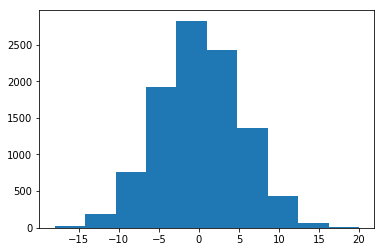

In [9]:
M = 30
print 'mean position after', M, 'time steps = ', \
np.mean(simulations[:,M])
print 'std dev of position after', M, 'time steps = ', \
np.std(simulations[:,M])
_,_,_ = plt.hist(simulations[:,M])

[    0.     0.  5022.  5022.  6294.  6294.  6923.  6923.  7279.  7279.
  7543.  7543.  7754.  7754.  7923.  7923.  8034.  8034.  8136.  8136.
  8233.  8233.  8295.  8295.  8360.  8360.  8422.  8422.  8486.  8486.
  8540.  8540.  8583.  8583.  8633.  8633.  8673.  8673.  8716.  8716.
  8737.  8737.  8770.  8770.  8791.  8791.  8821.  8821.  8844.  8844.
  8868.  8868.  8898.  8898.  8921.  8921.  8935.  8935.  8958.  8958.
  8970.  8970.  8989.  8989.  9004.  9004.  9020.  9020.  9037.  9037.
  9054.  9054.  9067.  9067.  9075.  9075.  9083.  9083.  9092.  9092.
  9100.  9100.  9109.  9109.  9113.  9113.  9118.  9118.  9125.  9125.
  9133.  9133.  9141.  9141.  9150.  9150.  9160.  9160.  9170.  9170.
  9176.]


Text(0,0.5,u'fraction of random walks that returned to 0')

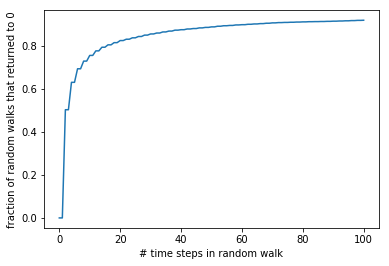

In [10]:
# we now want to see the ratio of simulations that returned to zero
# we'll do this for every M and plot

numbers_of_walks_that_went_back_to_0 = np.zeros(max_M+1)

def has_zero(xs):
    for x in xs:
        if x == 0:
            return True
    return False

for M in range(1,max_M+1):
    for i in range(N):
        # don't want to count t=0:
        if has_zero(simulations[i][1:M+1]):   
            numbers_of_walks_that_went_back_to_0[M] += 1

print numbers_of_walks_that_went_back_to_0
        
# to get the ratio, we need to divide by number of simulations 
plt.plot(numbers_of_walks_that_went_back_to_0 / float(N))
plt.xlabel('# time steps in random walk')
plt.ylabel('fraction of random walks that returned to 0')